<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/Lab1_Gallardo_Marcelo_(Cuadernillo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 - Gallardo Marcelo

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir los ingresos de precios dinámicos de diferentes productos, se toma en cuenta los datos: si tiene publicidad paga, disponibilidad, precios competidores, clicks, añadidos al carro de compras, orden concretada, precios

<a id="section4"></a>
### Normalización de caracteristicas


In [ ]:
# Cargar datos
data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/DataSets_Lab1/Revenue_Forecast_for_Dynamic_Pricing.csv', delimiter='|', max_rows=100000, skip_header=1, usecols=range(3, 11))
X = data[:, :7]
y = data[:, -1]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:, 0]', 'X[:, 1]','X[:, 2]', 'X[:, 3]','X[:, 4]', 'X[:, 5]','X[:, 6]',  'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], y[i]))

100000
 X[:, 0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5] X[:, 6]         y
--------------------------
       0       2      15       1       0       0      17         0
       1       1       9       0       1       0       9         0
       0       1      15       0       1       0      16         0
       1       1       7       0       0       1       7         7
       0       1       4       0       0       1       4         4
       0       1      14       0       0       1      10        10
       1       1       3       0       0       1       4         4
       0       1       9       1       0       0       9         0
       0       1      11       1       0       0      12         0
       1       1       9       1       0       0       9         0


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Calculamos los datos de media y desviacion estandar para la normalizacion

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 0.    2.   14.6  ...  0.    0.   16.89]
 [ 1.    1.    8.57 ...  1.    0.    8.75]
 [ 0.    1.   14.77 ...  1.    0.   16.06]
 ...
 [ 1.    1.    5.04 ...  0.    1.    4.35]
 [ 1.    1.   24.18 ...  0.    1.   25.19]
 [ 1.    1.    7.79 ...  1.    0.    8.75]]
Media calculada: [ 0.35201    1.07955   12.4984629  0.37941    0.24672    0.37387
 12.7325989]
Desviación estandar calculada: [ 0.47759707  0.31247688 12.04311781  0.4852402   0.43110236  0.48382975
 12.23037276]
[[-0.73704389  2.94565798  0.17450108 ... -0.57230028 -0.7727305
   0.33992432]
 [ 1.35677131 -0.25457884 -0.32619982 ...  1.74733445 -0.7727305
  -0.32563185]
 [-0.73704389 -0.25457884  0.18861703 ...  1.74733445 -0.7727305
   0.27206048]
 ...
 [ 1.35677131 -0.25457884 -0.61931329 ... -0.57230028  1.29411225
  -0.68539194]
 [ 1.35677131 -0.25457884  0.96997615 ... -0.57230028  1.29411225
   1.01856267]
 [ 1.35677131 -0.25457884 -0.3909671  ...  1.74733445 -0.7727305
  -0.32563185]]


In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -0.73704389  2.94565798 ... -0.57230028 -0.7727305
   0.33992432]
 [ 1.          1.35677131 -0.25457884 ...  1.74733445 -0.7727305
  -0.32563185]
 [ 1.         -0.73704389 -0.25457884 ...  1.74733445 -0.7727305
   0.27206048]
 ...
 [ 1.          1.35677131 -0.25457884 ... -0.57230028  1.29411225
  -0.68539194]
 [ 1.          1.35677131 -0.25457884 ... -0.57230028  1.29411225
   1.01856267]
 [ 1.          1.35677131 -0.25457884 ...  1.74733445 -0.7727305
  -0.32563185]]


Empleamos la formula:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 5.30100053 -0.05831778 -0.088597    1.62899153 -2.75490334 -2.0383966
  4.57918812  2.54576012]


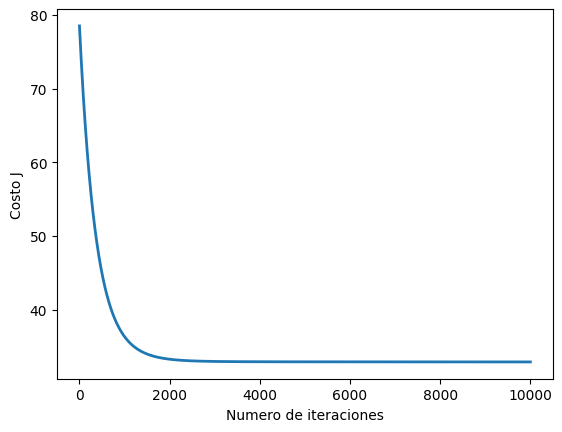

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


## Predicciones.-

In [ ]:
X_array = [1, 0, 1, 23.45, 1, 0, 1, 20]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: Sin publicidad, poca disponibilidad, precio competidor 23.45, 1 click, 0 agregados, 1 orden, precio 20: ${:.0f}'.format(price))

El ingreso predecido para un producto: Sin publicidad, poca disponibilidad, precio competidor 23.45, 1 click, 0 agregados, 1 orden, precio 20: $12


In [ ]:
X_array = [1, 1, 3, 10, 1, 1, 1, 11]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 10, 1 click, 1 agregados, 1 orden, precio 11: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 10, 1 click, 1 agregados, 1 orden, precio 11: $3


In [ ]:
X_array = [1, 1, 3, 53.85, 0, 0, 1, 50]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 53.85, 0 click, 0 agregados, 1 ordenes, precio 50: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 53.85, 0 click, 0 agregados, 1 ordenes, precio 50: $27


In [ ]:
X_array = [1, 0, 2, 5, 1, 0, 0, 5]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 5, 1 click, 0 agregados, 0 orden, precio 5: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 5, 1 click, 0 agregados, 0 orden, precio 5: $-3


In [ ]:
X_array = [1, 1, 1, 40, 3, 2, 2, 45]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 40, 3 click, 2 agregados, 2 orden, precio 45: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 40, 3 click, 2 agregados, 2 orden, precio 45: $8


In [ ]:
X_array = [1, 0, 3, 75, 0, 1, 1, 70]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: sin publicidad, alta disponibilidad, precio competidor 75, 0 click, 1 agregados, 1 orden, precio 70: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, alta disponibilidad, precio competidor 75, 0 click, 1 agregados, 1 orden, precio 70: $30


In [ ]:
X_array = [1, 1, 1, 0.5, 1, 0, 1, 0.5]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 0.5, 1 click, 0 agregados, 1 orden, precio 0.5: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 0.5, 1 click, 0 agregados, 1 orden, precio 0.5: $5


In [ ]:
X_array = [1, 0, 2, 44, 1, 2, 0, 40]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 44, 1 click, 2 agregados, 0 orden, precio 40: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 44, 1 click, 2 agregados, 0 orden, precio 40: $-0


In [ ]:
X_array = [1, 0, 1, 42, 1, 1, 0, 41]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: sin publicidad, baja disponibilidad, precio competidor 42, 1 click, 1 agregados, 0 orden, precio 41: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, baja disponibilidad, precio competidor 42, 1 click, 1 agregados, 0 orden, precio 41: $5


In [ ]:
X_array = [1, 1, 3, 60, 2, 2, 1, 65]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 60, 2 click, 2 agregados, 1 orden, precio 65: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 60, 2 click, 2 agregados, 1 orden, precio 65: $10


<a id="section7"></a>
### 2 Ecuacion de la Normal

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$


In [ ]:
# Cargar datos
data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/DataSets_Lab1/Revenue_Forecast_for_Dynamic_Pricing.csv', delimiter='|', max_rows=100000, skip_header=1, usecols=range(3, 11))
X = data[:, :7]
y = data[:, -1]
m = y.size
print(m)
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:, 0]', 'X[:, 1]','X[:, 2]', 'X[:, 3]','X[:, 4]', 'X[:, 5]','X[:, 6]',  'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], y[i]))
X = np.concatenate([np.ones((m, 1)), X], axis=1)

100000
 X[:, 0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5] X[:, 6]         y
--------------------------
       0       2      15       1       0       0      17         0
       1       1       9       0       1       0       9         0
       0       1      15       0       1       0      16         0
       1       1       7       0       0       1       7         7
       0       1       4       0       0       1       4         4
       0       1      14       0       0       1      10        10
       1       1       3       0       0       1       4         4
       0       1       9       1       0       0       9         0
       0       1      11       1       0       0      12         0
       1       1       9       1       0       0       9         0


In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));



Theta calculado a partir de la ecuación de la normal: [-41.92982969  -2.0312028   -5.05576923   0.12606276  38.24456569
  64.37831312  64.74383147   0.22744852]


## Predicciones

In [ ]:
X_array = [1, 0, 1, 23.45, 1, 0, 1, 20]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: Sin publicidad, poca disponibilidad, precio competidor 23.45, 1 click, 0 agregados, 1 orden, precio 20: ${:.0f}'.format(price))

El ingreso predecido para un producto: Sin publicidad, poca disponibilidad, precio competidor 23.45, 1 click, 0 agregados, 1 orden, precio 20: $64


In [ ]:
X_array = [1, 1, 3, 10, 1, 1, 1, 11]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 10, 1 click, 1 agregados, 1 orden, precio 11: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 10, 1 click, 1 agregados, 1 orden, precio 11: $112


In [ ]:
X_array = [1, 1, 3, 53.85, 0, 0, 1, 50]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 53.85, 2 click, 4 agregados, 2 ordenes, precio 50: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 53.85, 2 click, 4 agregados, 2 ordenes, precio 50: $24


In [ ]:
X_array = [1, 0, 2, 5, 1, 0, 0, 5]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 5, 1 click, 0 agregados, 0 orden, precio 5: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 5, 1 click, 0 agregados, 0 orden, precio 5: $-12


In [ ]:
X_array = [1, 1, 1, 40, 3, 2, 2, 45]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 40, 3 click, 2 agregados, 2 orden, precio 45: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 40, 3 click, 2 agregados, 2 orden, precio 45: $339


In [ ]:
X_array = [1, 0, 3, 75, 0, 1, 1, 70]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: sin publicidad, alta disponibilidad, precio competidor 75, 0 click, 1 agregados, 1 orden, precio 70: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, alta disponibilidad, precio competidor 75, 0 click, 1 agregados, 1 orden, precio 70: $97


In [ ]:
X_array = [1, 1, 1, 0.5, 1, 0, 1, 0.5]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 0.5, 1 click, 0 agregados, 1 orden, precio 0.5: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, baja disponibilidad, precio competidor 0.5, 1 click, 0 agregados, 1 orden, precio 0.5: $54


In [ ]:
X_array = [1, 0, 2, 44, 1, 2, 0, 40]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 44, 1 click, 2 agregados, 0 orden, precio 40: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, media disponibilidad, precio competidor 44, 1 click, 2 agregados, 0 orden, precio 40: $130


In [ ]:
X_array = [1, 0, 1, 42, 1, 1, 0, 41]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: sin publicidad, baja disponibilidad, precio competidor 42, 1 click, 1 agregados, 0 orden, precio 41: ${:.0f}'.format(price))

El ingreso predecido para un producto: sin publicidad, baja disponibilidad, precio competidor 42, 1 click, 1 agregados, 0 orden, precio 41: $70


In [ ]:
X_array = [1, 1, 3, 60, 2, 2, 1, 65]
price = np.dot(X_array, theta)

print('El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 60, 2 click, 2 agregados, 1 orden, precio 65: ${:.0f}'.format(price))

El ingreso predecido para un producto: con publicidad, alta disponibilidad, precio competidor 60, 2 click, 2 agregados, 1 orden, precio 65: $233
